# TP Perceptron, Perceptron multi-couches
### Dorian RENARD

#### 1. Préparer des données : coder les données textuelles en valeurs numériques

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import copy

attribut=["Name: 2 (democrat, republican)","handicapped-infants: 2 (y,n)","water-project-cost-sharing: 2 (y,n)","adoption-of-the-budget-resolution: 2 (y,n)","physician-fee-freeze: 2 (y,n)","el-salvador-aid: 2 (y,n)","religious-groups-in-schools: 2 (y,n)","anti-satellite-test-ban: 2 (y,n)","aid-to-nicaraguan-contras: 2 (y,n)","mx-missile: 2 (y,n)","immigration: 2 (y,n)","synfuels-corporation-cutback: 2 (y,n)","education-spending: 2 (y,n)","superfund-right-to-sue: 2 (y,n)","crime: 2 (y,n)","duty-free-exports: 2 (y,n)","export-administration-act-south-africa: 2 (y,n)"]

data = pd.read_csv('house-votes-84.data',header=None,names=attribut)
data=data.replace(['y','n','?','democrat','republican'],[1,-1,0,'D','R'])


data





,"Name: 2 (democrat, republican)","handicapped-infants: 2 (y,n)","water-project-cost-sharing: 2 (y,n)","adoption-of-the-budget-resolution: 2 (y,n)","physician-fee-freeze: 2 (y,n)","el-salvador-aid: 2 (y,n)","religious-groups-in-schools: 2 (y,n)","anti-satellite-test-ban: 2 (y,n)","aid-to-nicaraguan-contras: 2 (y,n)","mx-missile: 2 (y,n)","immigration: 2 (y,n)","synfuels-corporation-cutback: 2 (y,n)","education-spending: 2 (y,n)","superfund-right-to-sue: 2 (y,n)","crime: 2 (y,n)","duty-free-exports: 2 (y,n)","export-administration-act-south-africa: 2 (y,n)"
0,R,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,R,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,D,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,D,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,D,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,R,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1
431,D,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1
432,R,-1,0,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1
433,R,-1,-1,-1,1,1,1,0,0,0,0,-1,1,1,1,-1,1


In [6]:
file = open('house-votes-84.data','r')
lines = file.readlines()
file.close()

for line in lines:
    print(line.strip())
    
#on créer une matrice dans laquelle on met toutes les infos que l'on va exploiter
matrice_base = []
for line in lines:
    ligne = line.split(",")
    T = []
    # on met R a republican et D a democrate
    if ligne[0] == 'republican':
        T.append('R')
    else:
        T.append('D')
    # si c est y=1 ? =0 n=-1
    for i in range(1,17):
        if ligne[i] == 'y':
            T.append(1)
        elif ligne[i] == '?':
            T.append(0)
        else:
            T.append(-1)   
    matrice_base.append(T)
    
for i in matrice_base:
    print(i)
    



republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n
republican,n,y,n,y,y,y,n,n,n,n,y,?,y,y,?,?
democrat,n,y,y,n,n,n,y,y,y,n,n,n,y,n,?,?
democrat,y,y,y,n,n,y,y,y,?,y,y,?,n,n,y,?
republican,n,y,n,y,y,y,n,n,n,n,n,y,?,?,n,?
republican,n,y,n,y,y,y,n,n,n,y,n,y,y,?,n,?
democrat,y,n,y,n,n,y,n,y,?,y,y,y,?,n,n,y
democrat,y,?,y,n,n,n,y,y,y,n,n,n,y,n,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,?,y,y,n,n
democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
democrat,y,y,y,n,n,?,y,y,n,n,y,n,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,?,?,y,y
democrat,y,?,y,n,n,n,y,y,y,n,n,?,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,

In [17]:
labelApr=[]
DataApr=[]
label=[]
reste=[]
DataTest=[]
labelTest=[]

matrice= matrice_base
np.random.seed(123456789)
np.random.shuffle(matrice)
print(matrice[0],"\n")

for line in matrice:
    label.append(line[0])
    reste.append(line[1:])
    



DataApr=reste[:335]
DataTest=reste[335:]

labelApr=label[:335]
labelTest=label[335:]

print(DataApr)
print(labelApr)



['D', 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1] 

[[1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1], [1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1], [1, 0, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 0, 1, -1, -1], [-1, 1, 1, -1, -1, 1, 1, 1, 0, 1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1], [-1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 0, 1, 1, -1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1], [1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1], [-1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1], [1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1], [1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1], [-1, -1, 0, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1], [-1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1]

#### 2.Écrire une fonction "classify" qui permet de donner l'étiquette d'une observation à partir d'un vecteur de poids

In [18]:

#La fonction classify retourne une valeur >= 0 sur c'est un democrate et <0 si c'est un républicain
def classify(vecteur, test):
    tot=np.multiply(vecteur,test)
    return np.sum(tot)

poids = np.zeros(16)
poids[0]=1

def rd(valeur):
    if valeur>=0:
        return 'D'
    else:
        return 'R'


#### 3. Ecrire une fonction test qui prend en paramètre un corpus et un vecteur de poids et qui renvoie letaux d’erreur

In [19]:
def test(corpus, vecteur, attendu):
    tauxErr = 0
    for i in range(len(corpus)):
        estimation = classify(corpus[i], vecteur)
        if estimation >= 0:
            if attendu[i] == 'R':
                tauxErr +=1
        elif estimation < 0 :
            if attendu[i] == 'D':
                tauxErr +=1
    print("Nombre d'erreur : ", tauxErr)
    print("Taux erreur : ", tauxErr/(i+1)*100,"%\n")    
    
test(DataTest, poids, labelTest)
test(DataApr, poids, labelApr)

Nombre d'erreur :  26
Taux erreur :  26.0 %

Nombre d'erreur :  110
Taux erreur :  32.83582089552239 %



#### 4. Implémenter l’algorithme du perceptron dans une fonction train

In [20]:
taux_erreur = []

def train(poids):
    nbErreurs = 0
    for j in range(len(DataApr)):
        estimation = classify(DataApr[j],poids)
        if estimation>= 0:
            if (labelApr[j] == 'R'):
                #ici on change le poid 
                poids = np.add(poids, -1*np.array(DataApr[j]))
                nbErreurs += 1
        elif estimation < 0:
            if (labelApr[j] == 'D'):
                #ici on change le poid 
                poids = np.add(poids, 1*np.array(DataApr[j]))    
        taux_erreur.append(nbErreurs * 100 / (j+1) )
    return poids


train(poids)

array([-2.,  2.,  5., -9.,  0.,  1., -1., -3.,  1., -1.,  4., -1.,  3.,
        0., -2., -2.])

#### 5. Tracer la courbe d’´evolution du taux d’erreur en fonction de l’avancement de l’apprentissage (numéro de l’itération)

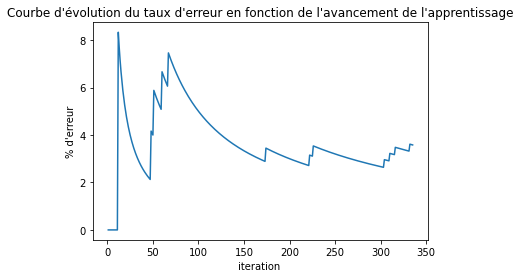

Taux d'erreur a la fin de l'apprentissage :  3.582089552238806 %


In [22]:
absi = np.linspace(1,335,335)

plt.title("Courbe d'évolution du taux d'erreur en fonction de l'avancement de l'apprentissage") 
plt.xlabel("iteration ") 
plt.ylabel("% d'erreur") 
plt.plot(absi,taux_erreur) 
plt.show()

print("Taux d'erreur a la fin de l'apprentissage : ", taux_erreur[-1], "%")

#### 6. Sommes nous sûrs d’atteindre une erreur nulle sur le corpus d’apprentissage ?